In [2]:
"""
This notebook seeks to find the difference in the results of Ollama and ChatGPT on each city, if we can identify any anomalies
"""

'\nThis notebook seeks to find the difference in the results of Ollama and ChatGPT on each city, if we can identify any anomalies\n'

In [3]:
import pandas as pd

In [8]:
chatgpt_df = pd.read_csv(r"E:\Github\AirportTrendAnalysis\data\airport_dataset_with_llm_weather.csv")

In [9]:
ollama_df = pd.read_csv(r"E:\Github\AirportTrendAnalysis\data\airport_dataset_with_ollama_weather.csv")

In [10]:
chatgpt_df.head(2)

,airport_name,city,country,iso_country,iata,altitude,latitude,longitude,original_city,avg_temperature,avg_wind_speed,avg_humidity,avg_visibility
0,goroka,goroka,Papua New Guinea,pg,gka,1609.9536,-6.08169,145.391998,Goroka,20,5.0,80.0,10.0
1,madang,madang,Papua New Guinea,pg,mag,6.0960,-5.20708,145.789002,Madang,28,10.0,80.0,19.0


In [11]:
ollama_df.head(2)

,airport_name,city,country,iso_country,iata,altitude,latitude,longitude,original_city,avg_temperature,avg_wind_speed,avg_humidity,avg_visibility
0,goroka,goroka,Papua New Guinea,pg,gka,1609.9536,-6.08169,145.391998,Goroka,18,15.0,82.0,10.0
1,madang,madang,Papua New Guinea,pg,mag,6.0960,-5.20708,145.789002,Madang,Expecting value: line 5 column 30 (char 114),NaN,NaN,NaN


In [15]:
chatgpt_df["avg_temperature"] = pd.to_numeric(chatgpt_df["avg_temperature"], errors='coerce')
chatgpt_df["avg_wind_speed"] = pd.to_numeric(chatgpt_df["avg_wind_speed"], errors='coerce')
chatgpt_df["avg_humidity"] = pd.to_numeric(chatgpt_df["avg_humidity"], errors='coerce')
chatgpt_df["avg_visibility"] = pd.to_numeric(chatgpt_df["avg_visibility"], errors='coerce')

ollama_df["avg_temperature"] = pd.to_numeric(ollama_df["avg_temperature"], errors='coerce')
ollama_df["avg_wind_speed"] = pd.to_numeric(ollama_df["avg_wind_speed"], errors='coerce')
ollama_df["avg_humidity"] = pd.to_numeric(ollama_df["avg_humidity"], errors='coerce')
ollama_df["avg_visibility"] = pd.to_numeric(ollama_df["avg_visibility"], errors='coerce')


In [16]:
# Compare the specific columns between the two DataFrames
comparison_df = pd.DataFrame({
    "airport_name": chatgpt_df["airport_name"],
    "avg_temperature_chatgpt": chatgpt_df["avg_temperature"],
    "avg_temperature_ollama": ollama_df["avg_temperature"],
    "avg_wind_speed_chatgpt": chatgpt_df["avg_wind_speed"],
    "avg_wind_speed_ollama": ollama_df["avg_wind_speed"],
    "avg_humidity_chatgpt": chatgpt_df["avg_humidity"],
    "avg_humidity_ollama": ollama_df["avg_humidity"],
    "avg_visibility_chatgpt": chatgpt_df["avg_visibility"],
    "avg_visibility_ollama": ollama_df["avg_visibility"]
})

In [18]:
comparison_df["avg_temperature_diff"] = comparison_df["avg_temperature_chatgpt"] - comparison_df["avg_temperature_ollama"]
comparison_df["avg_wind_speed_diff"] = comparison_df["avg_wind_speed_chatgpt"] - comparison_df["avg_wind_speed_ollama"]
comparison_df["avg_humidity_diff"] = comparison_df["avg_humidity_chatgpt"] - comparison_df["avg_humidity_ollama"]
comparison_df["avg_visibility_diff"] = comparison_df["avg_visibility_chatgpt"] - comparison_df["avg_visibility_ollama"]


In [19]:
comparison_df

,airport_name,avg_temperature_chatgpt,avg_temperature_ollama,avg_wind_speed_chatgpt,avg_wind_speed_ollama,avg_humidity_chatgpt,avg_humidity_ollama,avg_visibility_chatgpt,avg_visibility_ollama,avg_temperature_diff,avg_wind_speed_diff,avg_humidity_diff,avg_visibility_diff
0,goroka,20.0,18.0,5.0,15.0,80.0,82.0,10.0,10.0,2.0,-10.0,-2.0,0.0
1,madang,28.0,NaN,10.0,NaN,80.0,NaN,19.0,NaN,NaN,NaN,NaN,NaN
2,mounthagenkagamuga,21.0,NaN,16.0,NaN,84.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN
3,nadzab,28.0,20.0,6.0,10.0,83.0,80.0,12.0,15.0,8.0,-4.0,3.0,-3.0
4,portmoresbyjacksons,27.0,27.0,9.0,14.0,76.0,81.0,23.0,20.0,0.0,-5.0,-5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,rogachyovoairbase,-3.0,NaN,14.0,NaN,78.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN
7694,ulan-udeeast,-1.0,11.0,6.0,13.0,61.0,68.0,10.0,20.0,-12.0,-7.0,-7.0,-10.0
7695,krechevitsyairbase,6.0,-5.0,7.0,9.7,80.0,74.0,14.0,10.0,11.0,-2.7,6.0,4.0
7696,desiertodeatacama,20.0,17.0,10.0,10.0,70.0,64.0,25.0,20.0,3.0,0.0,6.0,5.0


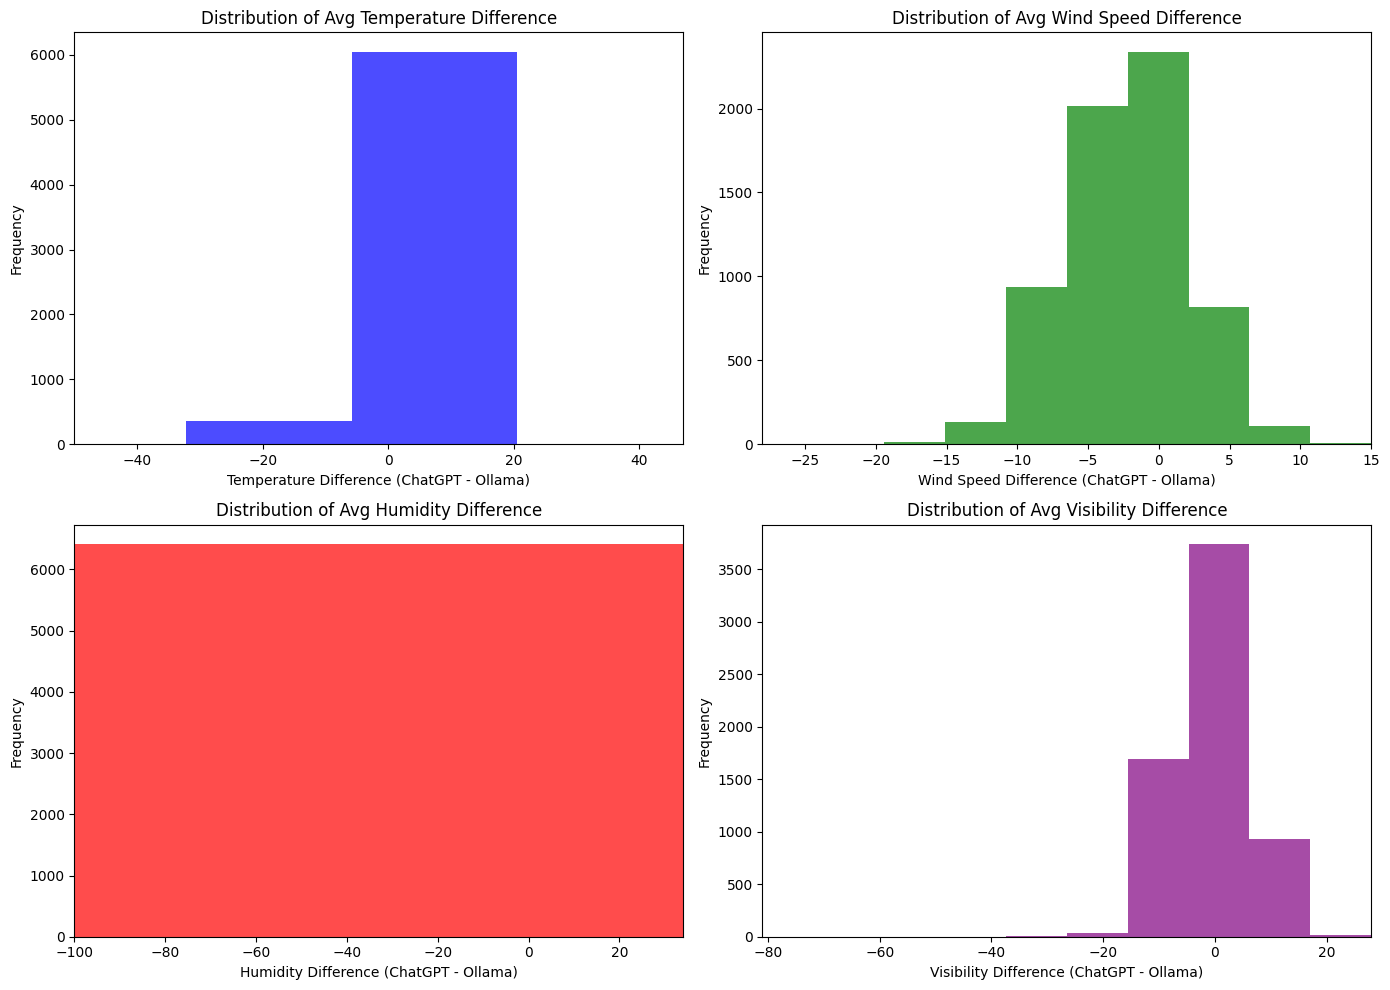

In [23]:
# Adjusting the plots for finer X-axis ranges for temperature and humidity differences

# Define a reasonable range for temperature and humidity differences
temp_diff_min = max(comparison_df["avg_temperature_diff"].min(), -50)
temp_diff_max = min(comparison_df["avg_temperature_diff"].max(), 50)
humidity_diff_min = max(comparison_df["avg_humidity_diff"].min(), -100)
humidity_diff_max = min(comparison_df["avg_humidity_diff"].max(), 100)

# Plotting the distribution of differences with adjusted ranges
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot for avg_temperature_diff
axs[0, 0].hist(comparison_df["avg_temperature_diff"].dropna(), bins=10, color='blue', alpha=0.7)
axs[0, 0].set_title('Distribution of Avg Temperature Difference')
axs[0, 0].set_xlabel('Temperature Difference (ChatGPT - Ollama)')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_xlim(temp_diff_min, temp_diff_max)

# Plot for avg_wind_speed_diff
axs[0, 1].hist(comparison_df["avg_wind_speed_diff"].dropna(), bins=10, color='green', alpha=0.7)
axs[0, 1].set_title('Distribution of Avg Wind Speed Difference')
axs[0, 1].set_xlabel('Wind Speed Difference (ChatGPT - Ollama)')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_xlim(comparison_df["avg_wind_speed_diff"].min(), comparison_df["avg_wind_speed_diff"].max())

# Plot for avg_humidity_diff
axs[1, 0].hist(comparison_df["avg_humidity_diff"].dropna(), bins=10, color='red', alpha=0.7)
axs[1, 0].set_title('Distribution of Avg Humidity Difference')
axs[1, 0].set_xlabel('Humidity Difference (ChatGPT - Ollama)')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_xlim(humidity_diff_min, humidity_diff_max)

# Plot for avg_visibility_diff
axs[1, 1].hist(comparison_df["avg_visibility_diff"].dropna(), bins=10, color='purple', alpha=0.7)
axs[1, 1].set_title('Distribution of Avg Visibility Difference')
axs[1, 1].set_xlabel('Visibility Difference (ChatGPT - Ollama)')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_xlim(comparison_df["avg_visibility_diff"].min(), comparison_df["avg_visibility_diff"].max())

# Adjust layout
plt.tight_layout()
plt.show()
